In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('wppool_growth_data_sample_20k.csv')
df

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,NaN,NaN,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,NaN,NaN,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,NaN,NaN,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,5/6/2023,9/29/2023,Free,USA,100,300,0,1,146,NaN,NaN,0,0
19996,19997,9/4/2023,9/21/2023,Pro,Germany,93,372,0,1,17,9/21/2023,Basic,49,1
19997,19998,4/1/2023,6/14/2023,Free,India,37,185,0,1,74,NaN,NaN,0,0
19998,19999,1/28/2023,12/26/2023,Pro,Australia,99,198,0,1,332,12/26/2023,Enterprise,29,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            20000 non-null  int64 
 1   install_date       20000 non-null  object
 2   last_active_date   20000 non-null  object
 3   subscription_type  20000 non-null  object
 4   country            20000 non-null  object
 5   total_sessions     20000 non-null  int64 
 6   page_views         20000 non-null  int64 
 7   download_clicks    20000 non-null  int64 
 8   activation_status  20000 non-null  int64 
 9   days_active        20000 non-null  int64 
 10  pro_upgrade_date   4029 non-null   object
 11  plan_type          4029 non-null   object
 12  monthly_revenue    20000 non-null  int64 
 13  churned            20000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.1+ MB


## Data Cleaning

In [5]:
df.columns

Index(['user_id', 'install_date', 'last_active_date', 'subscription_type',
       'country', 'total_sessions', 'page_views', 'download_clicks',
       'activation_status', 'days_active', 'pro_upgrade_date', 'plan_type',
       'monthly_revenue', 'churned'],
      dtype='object')

In [6]:
df['plan_type'] = df['plan_type'].fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            20000 non-null  int64 
 1   install_date       20000 non-null  object
 2   last_active_date   20000 non-null  object
 3   subscription_type  20000 non-null  object
 4   country            20000 non-null  object
 5   total_sessions     20000 non-null  int64 
 6   page_views         20000 non-null  int64 
 7   download_clicks    20000 non-null  int64 
 8   activation_status  20000 non-null  int64 
 9   days_active        20000 non-null  int64 
 10  pro_upgrade_date   4029 non-null   object
 11  plan_type          20000 non-null  object
 12  monthly_revenue    20000 non-null  int64 
 13  churned            20000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.1+ MB


In [7]:
# pro_upgrade_date to datetime format
df['pro_upgrade_date'] = pd.to_datetime(df['pro_upgrade_date'], errors = 'coerce')


In [8]:
# create a flag for users who upgraded to Pro
df['upgraded_to_pro'] = df['pro_upgrade_date'].notnull()

In [9]:
print(df[['pro_upgrade_date', 'upgraded_to_pro']].head())

  pro_upgrade_date  upgraded_to_pro
0              NaT            False
1              NaT            False
2              NaT            False
3       2023-11-09             True
4              NaT            False


In [10]:
# changing date columns to datetime
df['install_date'] = pd.to_datetime(df['install_date'], errors = 'coerce')
df['last_active_date'] = pd.to_datetime(df['last_active_date'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            20000 non-null  int64         
 1   install_date       20000 non-null  datetime64[ns]
 2   last_active_date   20000 non-null  datetime64[ns]
 3   subscription_type  20000 non-null  object        
 4   country            20000 non-null  object        
 5   total_sessions     20000 non-null  int64         
 6   page_views         20000 non-null  int64         
 7   download_clicks    20000 non-null  int64         
 8   activation_status  20000 non-null  int64         
 9   days_active        20000 non-null  int64         
 10  pro_upgrade_date   4029 non-null   datetime64[ns]
 11  plan_type          20000 non-null  object        
 12  monthly_revenue    20000 non-null  int64         
 13  churned            20000 non-null  int64         
 14  upgrad

## Data Exploration

### User engagement Analysis
1. Average Sessions per user type

In [11]:
# average sessions per type user
avg_sessions_by_plan = df.groupby('subscription_type')['total_sessions'].mean().reset_index()

avg_sessions_by_plan

,subscription_type,total_sessions
0,Free,76.081210
1,Pro,154.677836


2. Top 5 most active users(based on total sessions)

In [12]:
most_active_users = df.sort_values(by = 'total_sessions', ascending=False).head(5)

most_active_users[['user_id', 'total_sessions']]

,user_id,total_sessions
15351,15352,300
3965,3966,300
12849,12850,300
12191,12192,300
2456,2457,300


3. Top 5 countries with the highest engagement based on total sessions

In [13]:
# group by country and sum total sessions
country_engagement = df.groupby('country')['total_sessions'].sum().reset_index()

# sort in descending order and take top 5
top_5_countries = country_engagement.sort_values(by = 'total_sessions', ascending=False).head(5)

top_5_countries

,country,total_sessions
4,India,272202
3,Germany,266319
1,Canada,264217
6,USA,261635
2,France,259495


### Churn Analysis
1. Overall Churn Rate

In [14]:
# Calculate churn rate
churn_by_suscription = df.groupby('subscription_type')['churned'].mean().reset_index()

# convert to a percentage
churn_by_suscription['churn_rate (%)'] = churn_by_suscription['churned'] * 100


churn_by_suscription

,subscription_type,churned,churn_rate (%)
0,Free,0.285956,28.595579
1,Pro,0.282452,28.245222


The churn rate reveals that Free users have a higher churn rate compared to Pro users,indicating that users on the free plan are more likely to discontinue their subscription. This suggests that upgrading to a Pro plan is associated with higher retention

2. Top 3 factors Contributing to Churn using correlation

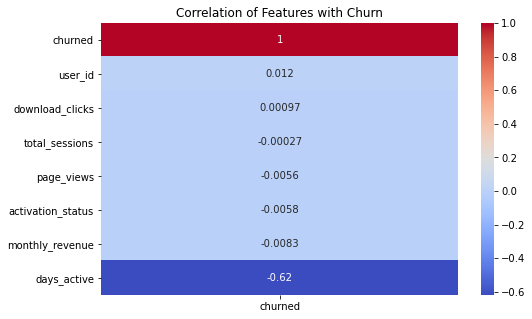

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix[['churned']].sort_values(by='churned', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Churn")
plt.show()


In [16]:
top_factors = correlation_matrix['churned'].drop('churned').abs().sort_values(ascending=False).head(3)
print("Top 3 Factors Contributing to Churn:")
print(top_factors)

Top 3 Factors Contributing to Churn:
days_active        0.617213
user_id            0.012038
monthly_revenue    0.008328
Name: churned, dtype: float64


Insights from above:
**days_active  0.617213**
- There is a strong negative correlation
- Users who are active for more days are significantly less likely to churn.

**user_id 0.012038**
- No meaningful correlation

**monthly_revenue 0.008328**
- There is a very weak correlation
- Slight indication that paying users churn less, but not statistically impactful here.

### Revenue & Upgrade Trends
1. Percentage of users upgraded from Free to Pro

In [17]:
# filter free users
free_users = df[df['subscription_type'] == 'Free']

# users who upgraded
upgraded_users = df[df['pro_upgrade_date'].notna()].shape[0]

total_free_users = len(free_users)

# free to pro rate
free_to_pro_rate = (upgraded_users / total_free_users) * 100 if total_free_users > 0 else 0

# results
print(f"Total Free users: {total_free_users}")
print(f"Total users who upgraded to Pro: {upgraded_users}")
print(f"Upgrade rate from Free to Pro: {free_to_pro_rate:.2f}%")

Total Free users: 15971
Total users who upgraded to Pro: 4029
Upgrade rate from Free to Pro: 25.23%


2. Total monthly revenue from pro users

In [18]:
total_monthly_revenue = df['monthly_revenue'].sum()
print(f"Total Monthly Revenue: ${total_monthly_revenue:,.2f}")


Total Monthly Revenue: $235,481.00


3. Pro plan (Basic, Standard, or Enterprise) that contributes the most revenue.

In [19]:
#filter oonly pro plan users
pro_users = df[df['plan_type'].isin(['Basic', 'Standard', 'Enterprise'])]

# group by plan type and sum revenue
revenue_by_plan = pro_users.groupby('plan_type')['monthly_revenue'].sum().reset_index()

# sort to find the highest
revenue_by_plan = revenue_by_plan.sort_values(by='monthly_revenue', ascending=False)
revenue_by_plan

,plan_type,monthly_revenue
0,Basic,80339
1,Enterprise,78764
2,Standard,76378


4. How long it takes for Free users to upgrade based on country and engagement level.

In [20]:
# Users who upgraded
free_upgraded = df[df['pro_upgrade_date'].notna()].copy()

# Calculate upgrade time in days
free_upgraded["upgrade_time"] = (free_upgraded["pro_upgrade_date"] - free_upgraded["install_date"]).dt.days

# Upgrade time by country
upgrade_time_by_country = (
    free_upgraded.groupby("country", observed=False)["upgrade_time"]
    .mean()
    .round(0)
    .astype(int)
    .sort_values()
)
# Print results
print("\nAverage upgrade time by country:")
print(upgrade_time_by_country)




Average upgrade time by country:
country
UK           88
USA          90
France       91
Germany      92
India        93
Australia    94
Canada       94
Name: upgrade_time, dtype: int32


- UK users upgrade the fastest (88 days)

In [21]:
# Bin engagement level using quantiles
engagement_bins = pd.qcut(df["total_sessions"], q=4, labels=["Low", "Medium", "High", "Very High"])
df["engagement_level"] = engagement_bins

# Assign binned levels to upgraded users only
free_upgraded["engagement_level"] = pd.qcut(free_upgraded["total_sessions"], q=4, labels=["Low", "Medium", "High", "Very High"])

# Upgrade time by engagement level
upgrade_time_by_engagement = (
    free_upgraded.groupby("engagement_level", observed=False)["upgrade_time"]
    .mean()
    .round(0)
    .astype(int)
    .sort_values()
)
print("\nAverage upgrade time by engagement level:")
print(upgrade_time_by_engagement)



Average upgrade time by engagement level:
engagement_level
Medium       90
High         91
Low          92
Very High    93
Name: upgrade_time, dtype: int32


- users with **medium engagement** upgraded the fastest, while **very high engagement users** took the longest to upgrade.

5. If WPPOOL increases the landing page conversion rate by 10%, what would be the estimated impact on Pro upgrades

In [22]:
def estimate_pro_upgrades(visitor_count, landing_conversion_rate, upgrade_rate, increase_percent=10):
   
    # Current number of Free users per month
    current_free_users = visitor_count * landing_conversion_rate
    
    # New conversion rate after increase
    new_conversion_rate = landing_conversion_rate * (1 + increase_percent / 100)
    
    # New Free users per month
    new_free_users = visitor_count * new_conversion_rate
    
    # Current and new Pro upgrades
    current_pro_upgrades = current_free_users * upgrade_rate
    new_pro_upgrades = new_free_users * upgrade_rate
    
    # Increase in Pro upgrades
    pro_upgrade_increase = new_pro_upgrades - current_pro_upgrades
    
    return {
        "Current Free Users": round(current_free_users),
        "New Free Users": round(new_free_users),
        "Current Pro Upgrades": round(current_pro_upgrades),
        "New Pro Upgrades": round(new_pro_upgrades),
        "Increase in Pro Upgrades": round(pro_upgrade_increase)
    }


In [23]:
# Example usage
visitor_count = 100000  # Monthly visitors
landing_conversion_rate = 0.05  # 5% conversion rate
upgrade_rate = 0.08  # 8% Free-to-Pro conversion rate
increase_percent = 10  # 10% boost in landing page conversion rate

impact = estimate_pro_upgrades(visitor_count, landing_conversion_rate, upgrade_rate, increase_percent)
print(impact)

{'Current Free Users': 5000, 'New Free Users': 5500, 'Current Pro Upgrades': 400, 'New Pro Upgrades': 440, 'Increase in Pro Upgrades': 40}


Insights from the above:
- 10% boost in landing page conversion = 10% more free users

    - Free users rise from 5,000 → 5,500

    - This is a direct impact of improved landing page effectiveness

- 💰 Resulting in 40 more Pro upgrades per month

    - Even though the free-to-Pro upgrade rate remains constant (8%), the volume increase leads to 40 more conversions

- 📉 Marginal gains add up

    - A small lift in top-of-funnel performance (landing page) leads to compounded growth in revenue-driving upgrades

- 📊 ROI Opportunity

    - If each Pro upgrade generates revenue, this uplift could justify investment in conversion optimization, such as A/B testing or landing page redesign

- ⚠️ Conversion rate drives user acquisition efficiency

    - A seemingly small % increase has a multiplying effect when visitor volumes are high (e.g., 100k+)



6. Run a simple A/B test simulation (e.g., using a chi-square test) to evaluate conversion optimization.

In [24]:

def run_ab_test(control_conversions, control_visitors, test_conversions, test_visitors):
    """
    Perform a chi-square test to evaluate A/B test results.
    
    :param control_conversions: Number of conversions in control group
    :param control_visitors: Number of visitors in control group
    :param test_conversions: Number of conversions in test group
    :param test_visitors: Number of visitors in test group
    :return: Dictionary with test statistics and interpretation
    """
    # Create contingency table
    contingency_table = [
        [control_conversions, control_visitors - control_conversions],
        [test_conversions, test_visitors - test_conversions]
    ]
    
    # Run Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Conversion rates
    control_rate = (control_conversions / control_visitors) * 100
    test_rate = (test_conversions / test_visitors) * 100
    lift = test_rate - control_rate

    # Interpret the result
    significance = "✅ Statistically Significant" if p < 0.05 else "❌ Not Statistically Significant"

    # Return summary
    return {
        "Control Conversion Rate (%)": round(control_rate, 2),
        "Test Conversion Rate (%)": round(test_rate, 2),
        "Lift (%)": round(lift, 2),
        "Chi-Square Statistic": round(chi2, 4),
        "P-Value": round(p, 4),
        "Degrees of Freedom": dof,
        "Significance": significance,
        "Expected Frequencies": expected
    }



In [25]:
# 🔁 Example A/B test scenario
control_conversions = 2500
control_visitors = 50000

test_conversions = 2800
test_visitors = 50000

# Run test and print result
ab_test_results = run_ab_test(control_conversions, control_visitors, test_conversions, test_visitors)
for key, value in ab_test_results.items():
    print(f"{key}: {value}")


Control Conversion Rate (%): 5.0
Test Conversion Rate (%): 5.6
Lift (%): 0.6
Chi-Square Statistic: 17.8122
P-Value: 0.0
Degrees of Freedom: 1
Significance: ✅ Statistically Significant
Expected Frequencies: [[ 2650. 47350.]
 [ 2650. 47350.]]


Insights from the above:
- 📈 The Test Variant Outperformed the Control

    - A conversion rate increase from 5.0% to 5.6% indicates a 12% relative improvement in performance.

- ✅ The Lift Is Statistically Significant

    - The p-value = 0.0000 shows the improvement is not due to random chance.

    - With χ² = 17.81, this is strong evidence that the test version is better.

- 📊 Business Impact Potential

    - Even a 0.6 percentage point lift translates to a large number of new conversions at scale.

    - For every 100,000 visitors, that's 600 more conversions — which could drive substantial revenue growth.

- 🧪 The Test Should Be Rolled Out

    - Given the statistically significant lift, WPPOOL should adopt the test version (e.g., new landing page, headline, or CTA) for all users.

